# CS 316 : Introduction to Deep Learning - Fall 2024
## Lab 03 : Shallow Neural Networks
### Dr. Abdul Samad

#### Objectives: linear regression equation, loss, meshgrid, contour plot and 3d plot

# Instructions

1. Make a copy of this notebook on google colab

2. Please rename your notebook as *Lab_3_aa1234.ipynb* before the final submission. Notebooks which do not follow appropriate naming convention will not be graded.

3. You have to submit this lab during the lab timings. You are allowed to submit till 11:59 PM on the day of your lab with a 30% penalty. No submissions will be accepted afterwards.

4. Please submit your own work. If you have any questions, please feel free to reach out to the course instructor or RA.

5. Use of AI is strictly prohibited. Anyone caught using Any AI tool during lab or while grading will be immediately reported to OCVS without any further discussion.

6. At the end of the lab, download the notebook and upload it on canvas as a file. Submitting link to notebook will not be accepted.

7. Each task has points assigned to it. Total Lab is of 100 points.

# Task Overview
The purpose of this notebook is to gain some familiarity with shallow neural networks with 1D and 2D inputs and gain some familiarity with activation functions.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and write code to complete the functions. There are also theoretical questions interspersed in the text. Attempt those as well.


# 1D Inputs
We will start with 1D inputs first. Run the below given cell to import the required libraries

In [1]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt

Let's first construct the shallow neural network with one input, three hidden units, and one output as described in Images given below.

<center>

![Google Drive Image](https://drive.google.com/uc?export=view&id=1iyC0TEKZX9oUwNtHKMXnmF0H9-Vdoe0G)

</center>


<center>

![picture](https://drive.google.com/uc?export=view&id=1r4Qakmw7-If7J7laUZyPW5_haL_gc-Rk)

</center>

This is same activation function you worked on in class and in activity 2. This activation function returns zero if the input is less than zero and returns
the input unchanged otherwise. In other words, it clips negative values to zero.

There are multiple ways to do this. Try exploring these 2: clip function in numpy array and conditional indexing.
  

In [2]:
# Define the Rectified Linear Unit (ReLU) function - Points: 10
def ReLU(preactivation):
  # TODO write code to implement the ReLU and compute the activation at the
  # hidden unit from the preactivation
  # Replace the given code with your code
  # To understand the input format, look at the code cell below this one

  return np.clip(preactivation, 0, None)

In [3]:
help(np.clip)

Help on _ArrayFunctionDispatcher in module numpy:

clip(a, a_min, a_max, out=None, **kwargs)
    Clip (limit) the values in an array.
    
    Given an interval, values outside the interval are clipped to
    the interval edges.  For example, if an interval of ``[0, 1]``
    is specified, values smaller than 0 become 0, and values larger
    than 1 become 1.
    
    Equivalent to but faster than ``np.minimum(a_max, np.maximum(a, a_min))``.
    
    No check is performed to ensure ``a_min < a_max``.
    
    Parameters
    ----------
    a : array_like
        Array containing elements to clip.
    a_min, a_max : array_like or None
        Minimum and maximum value. If ``None``, clipping is not performed on
        the corresponding edge. Only one of `a_min` and `a_max` may be
        ``None``. Both are broadcast against `a`.
    out : ndarray, optional
        The results will be placed in this array. It may be the input
        array for in-place clipping.  `out` must be of the right

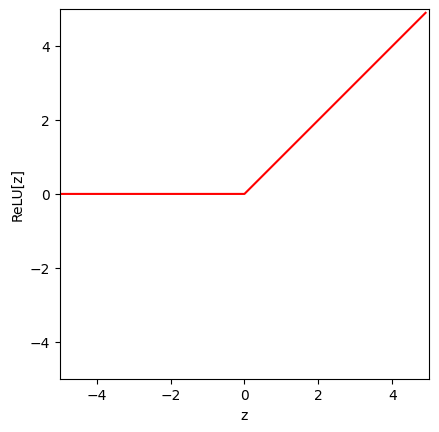

In [6]:
# Make an array of inputs
z = np.arange(-5,5,0.1)
RelU_z = ReLU(z)

# Plot the ReLU function
fig, ax = plt.subplots()
ax.plot(z,RelU_z,'r-')
ax.set_xlim([-5,5]);ax.set_ylim([-5,5])
ax.set_xlabel('z'); ax.set_ylabel('ReLU[z]')
ax.set_aspect('equal')
plt.show()

#Neural Network
This is a Neural Network with one input, one output and three hidden units

<center>

![picture](https://drive.google.com/uc?export=view&id=16Hd3LhPUP8_ct4uHKZomjNB_7TqpdfcJ)

</center>

In [7]:
# Define a shallow neural network with, one input, one output, and three hidden units - Points: 12
def shallow_1_1_3(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
  # TODO Replace the code below to compute the three initial lines
  # from the theta parameters (i.e. implement equations given at bottom of figure a-c below this Code Cell).  These are the preactivations
  pre_1 = theta_10 + theta_11*x
  pre_2 = theta_20 + theta_21*x
  pre_3 = theta_30 + theta_31*x


  # Pass these through the ReLU function to compute the activations as in figure d-f given below. No need to replace anything here
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)


  # TODO Replace the code below to weight the activations using phi1, phi2 and phi3 to create the equivalent of figure g-i
  w_act_1 = act_1*phi_1
  w_act_2 = act_2*phi_2
  w_act_3 = act_3*phi_3


  # TODO Replace the code below to combining the weighted activations and add phi_0 to create the output as in figure j
  y = phi_0 + w_act_1 + w_act_2 + w_act_3


  # Return everything we have calculated
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

In [8]:
# Plot the shallow neural network.  We'll assume input in is range [0,1] and output [-1,1]
# If the plot_all flag is set to true, then we'll plot all the intermediate stages as in figure given below.
def plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=False, x_data=None, y_data=None):

  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,pre_1,'r-'); ax[0,0].set_ylabel('Preactivation')
    ax[0,1].plot(x,pre_2,'b-'); ax[0,1].set_ylabel('Preactivation')
    ax[0,2].plot(x,pre_3,'g-'); ax[0,2].set_ylabel('Preactivation')
    ax[1,0].plot(x,act_1,'r-'); ax[1,0].set_ylabel('Activation')
    ax[1,1].plot(x,act_2,'b-'); ax[1,1].set_ylabel('Activation')
    ax[1,2].plot(x,act_3,'g-'); ax[1,2].set_ylabel('Activation')
    ax[2,0].plot(x,w_act_1,'r-'); ax[2,0].set_ylabel('Weighted Act')
    ax[2,1].plot(x,w_act_2,'b-'); ax[2,1].set_ylabel('Weighted Act')
    ax[2,2].plot(x,w_act_3,'g-'); ax[2,2].set_ylabel('Weighted Act')

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,1]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
      ax[2,plot_y].set_xlabel('Input, $x$');
    plt.show()

  fig, ax = plt.subplots()
  ax.plot(x,y)
  ax.set_xlabel('Input, $x$'); ax.set_ylabel('Output, $y$')
  ax.set_xlim([0,1]);ax.set_ylim([-1,1])
  ax.set_aspect(0.5)
  if x_data is not None:
    ax.plot(x_data, y_data, 'mo')
    for i in range(len(x_data)):
      ax.plot(x_data[i], y_data[i],)
  plt.show()

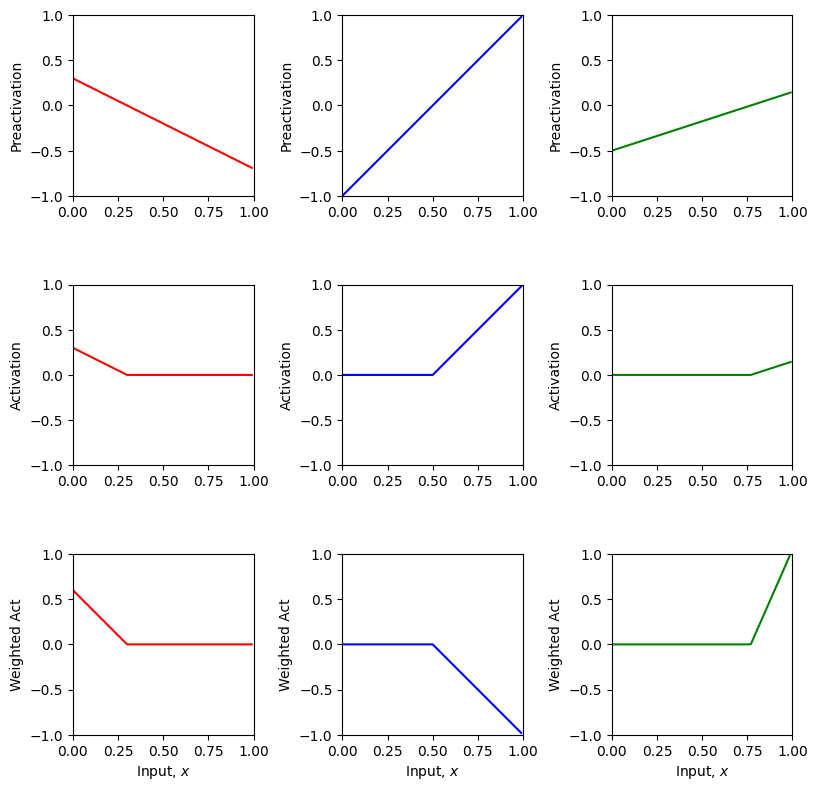

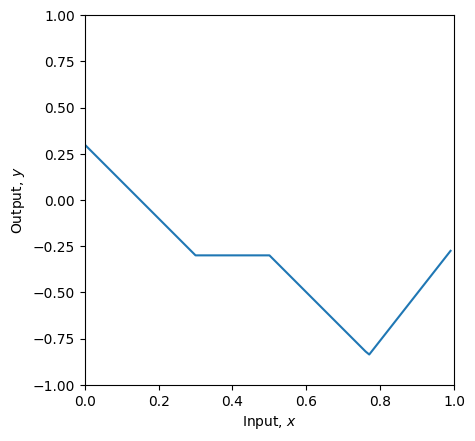

In [9]:
# Now lets define some parameters and run the neural network
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

If your code is correct, then the final output should look like this:


Now let's play with the parameters to make sure we understand how they work.  The original  parameters were:

$\theta_{10} =  0.3$ ; $\theta_{11} = -1.0$<br>
$\theta_{20} =  -1.0$ ; $\theta_{21} = 2.0$<br>
$\theta_{30} =  -0.5$ ; $\theta_{31} = 0.65$<br>
$\phi_0 = -0.3; \phi_1 = 2.0; \phi_2 = -1.0; \phi_3 = 7.0$

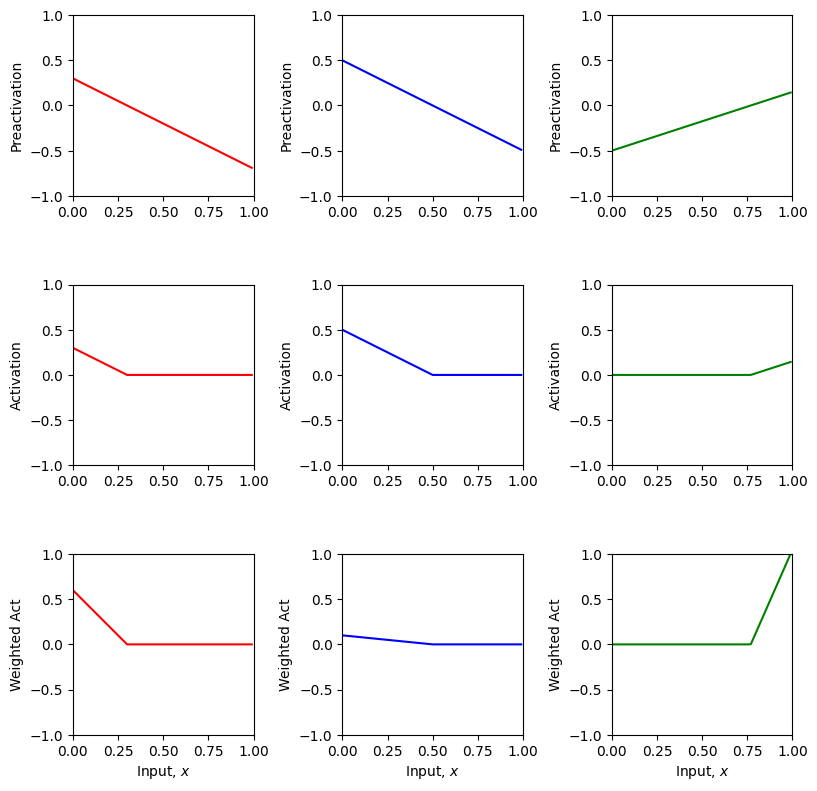

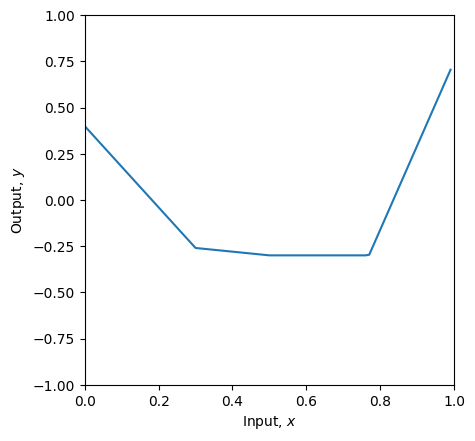

In [10]:
# TODO - Points: 20 (2.5 for each part. Answer this question in the cell space given below this cell)
# 1. Predict what effect changing phi_0 will have on the network.

# 2. Predict what effect multiplying phi_1, phi_2, phi_3 by 0.5 would have.  Check if you are correct

# 3. Predict what effect multiplying phi_1 by -1 will have.  Check if you are correct.

# 4. Predict what effect setting theta_20 to -1.2 will have.  Check if you are correct.

# 5. Change the parameters so that there are only two "joints" (including outside the range of the plot)
# There are actually three ways to do this. See if you can figure them all out

# 6. With the original parameters, the second line segment is flat (i.e. has slope zero)
# How could you change theta_10 so that all of the segments have non-zero slopes

# 7. What do you predict would happen if you multiply theta_20 and theta21 by 0.5, and phi_2 by 2.0?
# Check if you are correct.

# 8. What do you predict would happen if you multiply theta_20 and theta21 by -0.5, and phi_2 by -2.0?
# Check if you are correct.

theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0 * -0.5  ; theta_21 = 2.0 * -0.5
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0 ; phi_2 = -1.0 * -0.2; phi_3 = 7.0

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

# Write your answers to theoretical Questions Here

1.   The entire function gets translated upwards. Because the neural network's result is offset by a different value.
2.   The weights in the neural network are different this time and the effect on the function is that the breakpoints in the funciton lie on the same X positions but slopes are different. Generally the function is more linear.
3.   The weight of the first segment is being in the function is being negated. The observation is that the slpe of the first segment is not inversed.
4. The ouput of the network is translated towards the left by 0.2 units.
5. The trick is to set theta_xz = theta_yz (where 1<=x<=3 and 1<=y<=3 and x!=y and z is either 0 or 1), there can be more than three permutations of this, but namely three ways can be to set theta_10 = theta_20 or theta_20 = theta_30 or theta_11 = theta_21.
6. Increasing theta_10 by more than or equal to 0.5
7.  The last joint of the output of the neural network(The function) is now translated upwards and the so is the last joint and the slope of the second last joint is less steeper.
8. Same as 7.

# Least squares loss

Now let's consider fitting the network to data.  First we need to define the loss function.  We'll use the least squares loss:

<center>

![picture](https://drive.google.com/uc?export=view&id=1qyf-LJu26idDUQgJR1LNDg55zCJhxqlw)

</center>

where $(x_i,y_i)$ is an input/output training pair and $\text{f}[\bullet,\boldsymbol\phi]$ is the neural network with parameters $\boldsymbol\phi$.  The first term in the brackets is the ground truth output and the second term is the prediction of the model
figure 2.2 book,


In [11]:
# Least squares function - Points: 10
def least_squares_loss(y_train, y_predict):
  # TODO Replace the line below to compute the sum of squared
  # differences between the real values of y and the predicted values from the model f[x_i,phi] (figure given above)
  # you will need to use the function np.sum
  # Loop is not allowed
  loss = np.sum((y_train - y_predict)**2)
  return loss

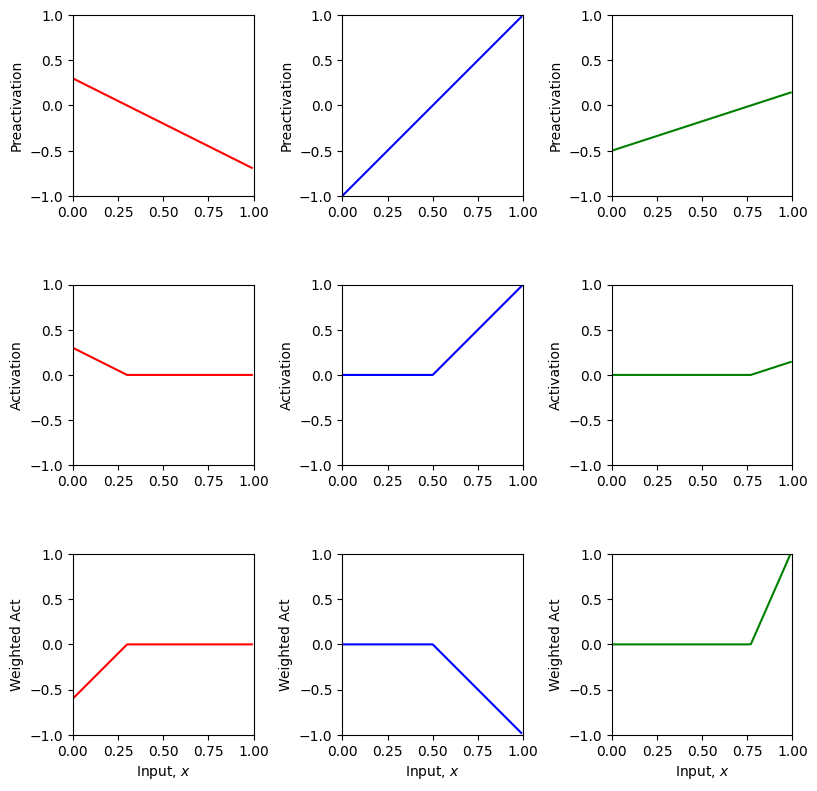

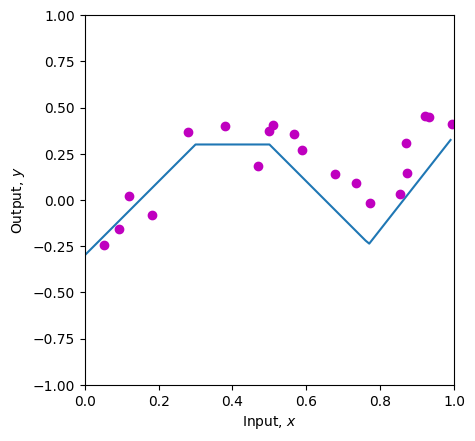

Your Loss = 0.582, True value = 9.385


In [12]:
# Now lets define some parameters, run the neural network, and compute the loss
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3 * -1; phi_1 = 2.0 * -1; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = np.arange(0,1,0.01)

x_train = np.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,\
                   0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,\
                   0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,\
                   0.87168699,0.58858043])
y_train = np.array([-0.15934537,0.18195445,0.451270150,0.13921448,0.09366691,0.30567674,\
                    0.372291170,0.40716968,-0.08131792,0.41187806,0.36943738,0.3994327,\
                    0.019062570,0.35820410,0.452564960,-0.0183121,0.02957665,-0.24354444, \
                    0.148038840,0.26824970])

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True, x_data = x_train, y_data = y_train)

# Run the neural network on the training data
y_predict, *_ = shallow_1_1_3(x_train, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

# print(y_train)
# print(y_predict)

# Compute the least squares loss and print it out
loss = least_squares_loss(y_train,y_predict)
print('Your Loss = %3.3f, True value = 9.385'%(loss))

# TODO.  Manipulate the parameters (by hand!) to make the function  - Points: 8
# fit the data better and try to reduce the loss to as small a number
# as possible.  The best that I could do was 0.181
# Tip... start by manipulating phi_0.
# It's not that easy, so don't spend too much time on this!


# 2D Inputs
Let's work on 2D inputs now


In [13]:
import plotly.graph_objects as go

# Code to draw 2D function -- read it so you know what is going on, but you don't have to change it
def draw_2D_function(ax, x1_mesh, x2_mesh, y):
    pos = ax.contourf(x1_mesh, x2_mesh, y, levels=256 ,cmap = 'hot', vmin=-10,vmax=10.0)
    ax.set_xlabel('x1');ax.set_ylabel('x2')
    levels = np.arange(-10,10,1.0)
    ax.contour(x1_mesh, x2_mesh, y, levels, cmap='winter')

# Plot the shallow neural network.  We'll assume input in is range [0,10],[0,10] and output [-10,10]
def plot_neural_2_inputs(x1,x2, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3):

  fig, ax = plt.subplots(3,3)
  fig.set_size_inches(8.5, 8.5)
  fig.tight_layout(pad=3.0)
  draw_2D_function(ax[0,0], x1,x2,pre_1); ax[0,0].set_title('Preactivation')
  draw_2D_function(ax[0,1], x1,x2,pre_2); ax[0,1].set_title('Preactivation')
  draw_2D_function(ax[0,2], x1,x2,pre_3); ax[0,2].set_title('Preactivation')


  draw_2D_function(ax[1,0], x1,x2,act_1); ax[1,0].set_title('Activation')
  draw_2D_function(ax[1,1], x1,x2,act_2); ax[1,1].set_title('Activation')
  draw_2D_function(ax[1,2], x1,x2,act_3); ax[1,2].set_title('Activation')
  draw_2D_function(ax[2,0], x1,x2,w_act_1); ax[2,0].set_title('Weighted Act')
  draw_2D_function(ax[2,1], x1,x2,w_act_2); ax[2,1].set_title('Weighted Act')
  draw_2D_function(ax[2,2], x1,x2,w_act_3); ax[2,2].set_title('Weighted Act')
  plt.show()

  fig, ax = plt.subplots()
  draw_2D_function(ax,x1,x2,y)
  ax.set_title('Network output, $y$')
  ax.set_aspect(1.0)
  plt.show()



Use this image for the next function

<center>

![picture](https://drive.google.com/uc?export=view&id=1i5dCLGJav7rJYpVew_mmg9gIverbpc-u)

</center>

<center>

![picture](https://drive.google.com/uc?export=view&id=1ioU7N0uCWN-ve6LbWC6x4VVa-FwDAzxR)

</center>

<center>

![picture](https://drive.google.com/uc?export=view&id=1-ZDL7uzP7g-gEH3QlBMglSc3goRX4Qgk)

</center>

<center>

![picture](https://drive.google.com/uc?export=view&id=1fxCVNFFOm0D0tPbwtDiIVIsbg0V19A88)

</center>


In [14]:
# Define a shallow neural network with, two input, one output, and three hidden units - Points: 12
def shallow_2_1_3(x1,x2, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11,\
                  theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32):
  # TODO Replace the lines below to compute the three initial linear functions
  # (figure a-c) from the theta parameters.  These are the preactivations
  pre_1 = theta_10 + theta_11 * x1 + theta_12 * x2
  pre_2 = theta_20 + theta_21 * x1 + theta_22 * x2
  pre_3 = theta_30 + theta_31 * x1 + theta_32 * x2

  # Pass these through the ReLU function to compute the activations as in figure d-f
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)

  # TODO Replace the code below to weight the activations using phi1, phi2 and phi3
  # To create the equivalent of figure g-i
  w_act_1 = phi_1 * act_1
  w_act_2 = phi_2 * act_2
  w_act_3 = phi_3 * act_3

  # TODO Replace the code below to combing the weighted activations and add
  # phi_0 to create the output as in j
  y = phi_0 + w_act_1 + w_act_2 + w_act_3

  # Return everything we have calculated
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

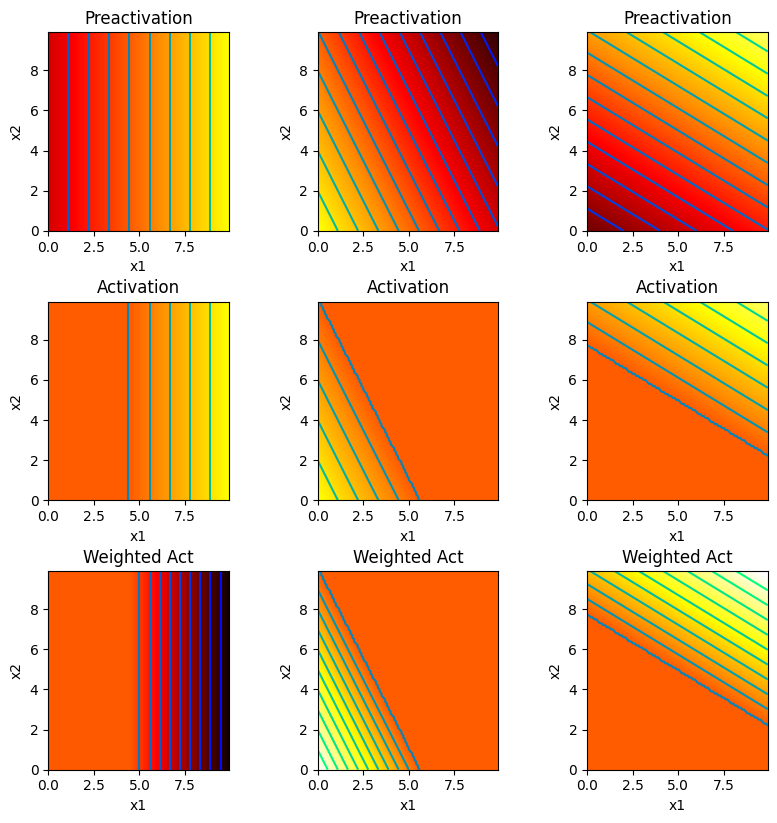

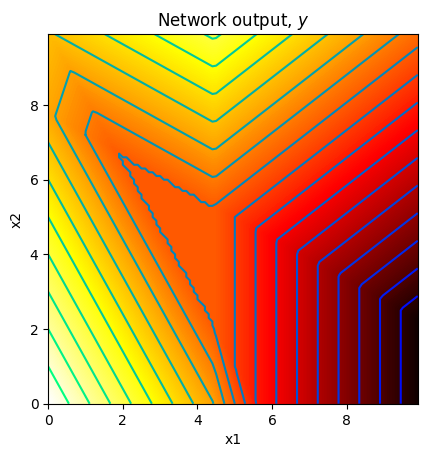

In [15]:
# Now lets define some parameters and run the neural network
theta_10 =  -4.0 ;  theta_11 = 0.9; theta_12 = 0.0
theta_20 =  5.0  ; theta_21 = -0.9 ; theta_22 = -0.5
theta_30 =  -7  ; theta_31 = 0.5; theta_32 = 0.9
phi_0 = 0.0; phi_1 = -2.0; phi_2 = 2.0; phi_3 = 1.5

x1 = np.arange(0.0, 10.0, 0.1)
x2 = np.arange(0.0, 10.0, 0.1)
x1,x2 = np.meshgrid(x1 ,x2)


# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_2_1_3(x1,x2, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32)
# And then plot it

plot_neural_2_inputs(x1,x2, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3)

How many different linear polytopes are made by this model?  Identify each in the network output.

There are 19 different polytopes.

Now we'll extend this model to have two outputs $y_1$ and $y_2$, each of which can be visualized with a separate heatmap.  You will now have sets of parameters $\phi_{10}, \phi_{11}, \phi_{12}, \phi_{13}$ and $\phi_{20}, \phi_{21}, \phi_{22}, \phi_{23}$ that correspond to each of these outputs.

In [16]:
# Plot the shallow neural network.  We'll assume input in is range [0,10],[0,10] and output [-10,10]
def plot_neural_2_inputs_2_outputs(x1,x2, y1, y2, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_11, w_act_12, w_act_13, w_act_21, w_act_22, w_act_23):

  # Plot intermediate plots if flag set
  fig, ax = plt.subplots(4,3)
  fig.set_size_inches(8.5, 8.5)
  fig.tight_layout(pad=3.0)
  draw_2D_function(ax[0,0], x1,x2,pre_1); ax[0,0].set_title('Preactivation')
  draw_2D_function(ax[0,1], x1,x2,pre_2); ax[0,1].set_title('Preactivation')
  draw_2D_function(ax[0,2], x1,x2,pre_3); ax[0,2].set_title('Preactivation')
  draw_2D_function(ax[1,0], x1,x2,act_1); ax[1,0].set_title('Activation')
  draw_2D_function(ax[1,1], x1,x2,act_2); ax[1,1].set_title('Activation')
  draw_2D_function(ax[1,2], x1,x2,act_3); ax[1,2].set_title('Activation')
  draw_2D_function(ax[2,0], x1,x2,w_act_11); ax[2,0].set_title('Weighted Act 1')
  draw_2D_function(ax[2,1], x1,x2,w_act_12); ax[2,1].set_title('Weighted Act 1')
  draw_2D_function(ax[2,2], x1,x2,w_act_13); ax[2,2].set_title('Weighted Act 1')
  draw_2D_function(ax[3,0], x1,x2,w_act_21); ax[3,0].set_title('Weighted Act 2')
  draw_2D_function(ax[3,1], x1,x2,w_act_22); ax[3,1].set_title('Weighted Act 2')
  draw_2D_function(ax[3,2], x1,x2,w_act_23); ax[3,2].set_title('Weighted Act 2')
  plt.show()

  fig, ax = plt.subplots()
  draw_2D_function(ax,x1,x2,y1)
  ax.set_title('Network output, $y_1$')
  ax.set_aspect(1.0)
  plt.show()

  fig, ax = plt.subplots()
  draw_2D_function(ax,x1,x2,y2)
  ax.set_title('Network output, $y_2$')
  ax.set_aspect(1.0)
  plt.show()

In [17]:
# Define a shallow neural network with, two inputs, two outputs, and three hidden units - Points: 14
def shallow_2_2_3(x1,x2, activation_fn, phi_10,phi_11,phi_12,phi_13, phi_20,phi_21,phi_22,phi_23, theta_10, theta_11,\
                  theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32):

  # TODO -- write this function -- replace the dummy code below
  pre_1 = theta_10 + theta_11 * x1 + theta_12 * x2
  pre_2 = theta_20 + theta_21 * x1 + theta_22 * x2
  pre_3 = theta_30 + theta_31 * x1 + theta_32 * x2

  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)

  w_act_11 = phi_11 * act_1
  w_act_12 = phi_12 * act_2
  w_act_13 = phi_13 * act_3
  w_act_21 = phi_21 * act_1
  w_act_22 = phi_22 * act_2
  w_act_23 = phi_23 * act_3

  y1 = phi_10 + w_act_11 + w_act_12 + w_act_13
  y2 = phi_10 + w_act_21 + w_act_22 + w_act_23


  # Return everything we have calculated
  return y1,y2, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_11, w_act_12, w_act_13, w_act_21, w_act_22, w_act_23


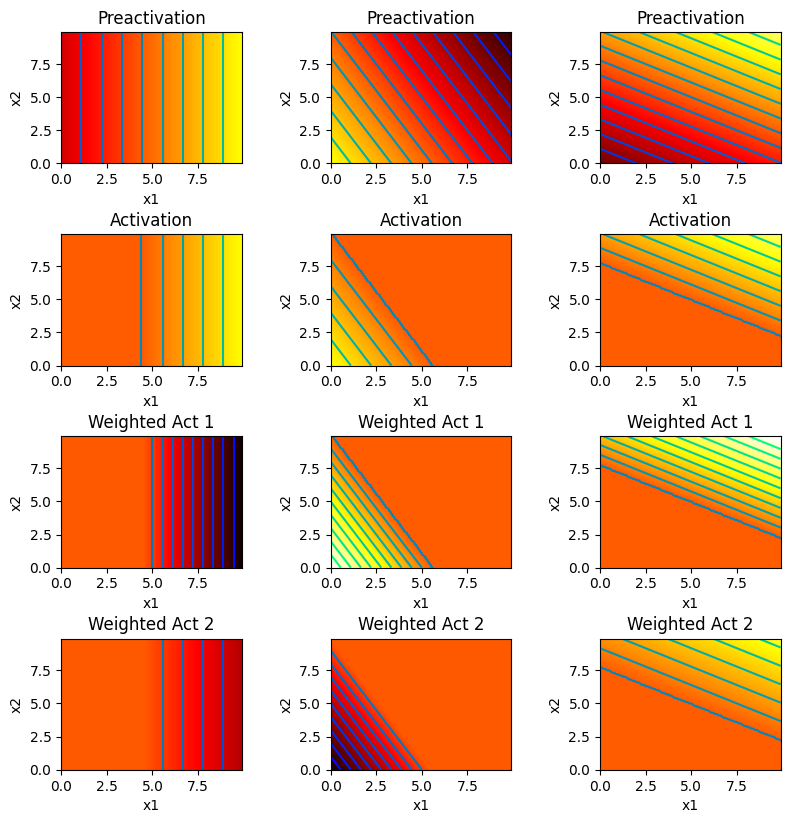

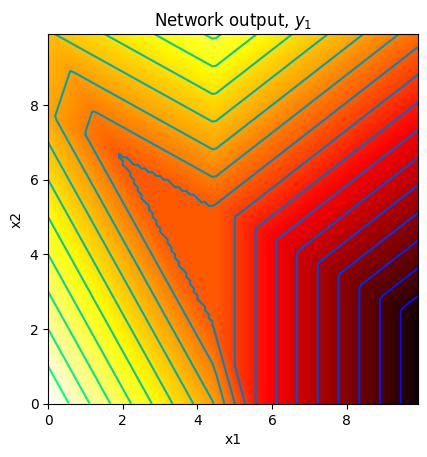

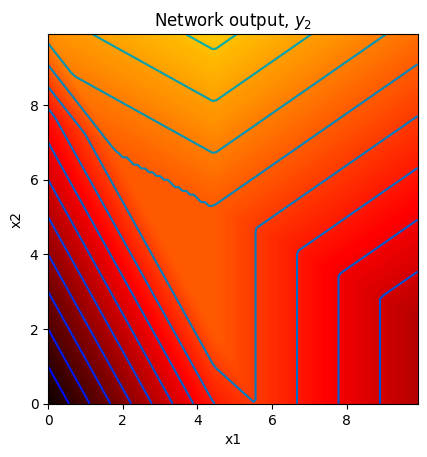

In [18]:
# Now lets define some parameters and run the neural network
theta_10 =  -4.0 ;  theta_11 = 0.9; theta_12 = 0.0
theta_20 =  5.0  ; theta_21 = -0.9 ; theta_22 = -0.5
theta_30 =  -7  ; theta_31 = 0.5; theta_32 = 0.9
phi_10 = 0.0; phi_11 = -2.0; phi_12 = 2.0; phi_13 = 1.5
phi_20 = -2.0; phi_21 = -1.0; phi_22 = -2.0; phi_23 = 0.8

x1 = np.arange(0.0, 10.0, 0.1)
x2 = np.arange(0.0, 10.0, 0.1)
x1,x2 = np.meshgrid(x1,x2)

# We run the neural network for each of these input values
y1, y2, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_11, w_act_12, w_act_13, w_act_21, w_act_22, w_act_23 = \
    shallow_2_2_3(x1,x2, ReLU, phi_10,phi_11,phi_12,phi_13, phi_20,phi_21,phi_22,phi_23, theta_10, theta_11, theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32)
# And then plot it
plot_neural_2_inputs_2_outputs(x1,x2, y1, y2, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_11, w_act_12, w_act_13, w_act_21, w_act_22, w_act_23)

# Activation functions

Let's work with Activation Functions now

Please use the below given figure for next parts. Its same as the one in your activity 2.

<center>

![picture](https://drive.google.com/uc?export=view&id=1d4H8mpGevUpVvGEAODq0Mu0wVwgnD9s6)

</center>

<center>

![picture](https://drive.google.com/uc?export=view&id=1IOV4kW63G7YQJ6VrlWfHLpwx2ko2kxXZ)

</center>




In [19]:
# Plot the shallow neural network.  We'll assume input is in range [0,1] and output [-1,1]
# If the plot_all flag is set to true, then we'll plot all the intermediate stages as in activity 2 (also given in image above).
def plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=False, x_data=None, y_data=None):

  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,pre_1,'r-'); ax[0,0].set_ylabel('Preactivation')
    ax[0,1].plot(x,pre_2,'b-'); ax[0,1].set_ylabel('Preactivation')
    ax[0,2].plot(x,pre_3,'g-'); ax[0,2].set_ylabel('Preactivation')
    ax[1,0].plot(x,act_1,'r-'); ax[1,0].set_ylabel('Activation')
    ax[1,1].plot(x,act_2,'b-'); ax[1,1].set_ylabel('Activation')
    ax[1,2].plot(x,act_3,'g-'); ax[1,2].set_ylabel('Activation')
    ax[2,0].plot(x,w_act_1,'r-'); ax[2,0].set_ylabel('Weighted Act')
    ax[2,1].plot(x,w_act_2,'b-'); ax[2,1].set_ylabel('Weighted Act')
    ax[2,2].plot(x,w_act_3,'g-'); ax[2,2].set_ylabel('Weighted Act')

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,1]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
      ax[2,plot_y].set_xlabel('Input, $x$');
    plt.show()

  fig, ax = plt.subplots()
  ax.plot(x,y)
  ax.set_xlabel('Input, $x$'); ax.set_ylabel('Output, $y$')
  ax.set_xlim([0,1]);ax.set_ylim([-1,1])
  ax.set_aspect(0.5)
  if x_data is not None:
    ax.plot(x_data, y_data, 'mo')
    for i in range(len(x_data)):
      ax.plot(x_data[i], y_data[i],)
  plt.show()

First, let's run the network with a ReLU function.

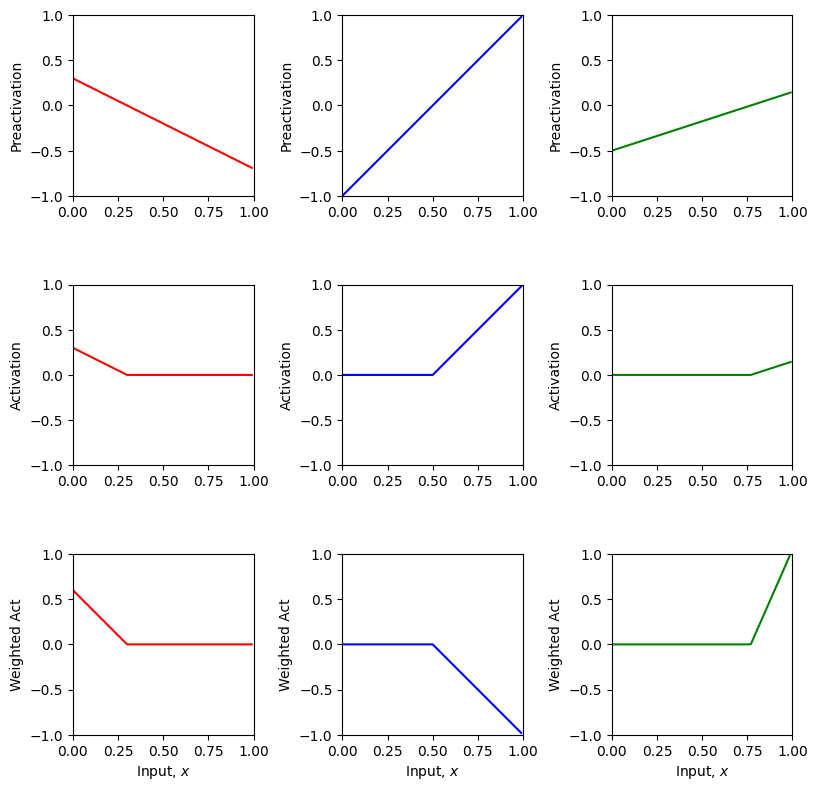

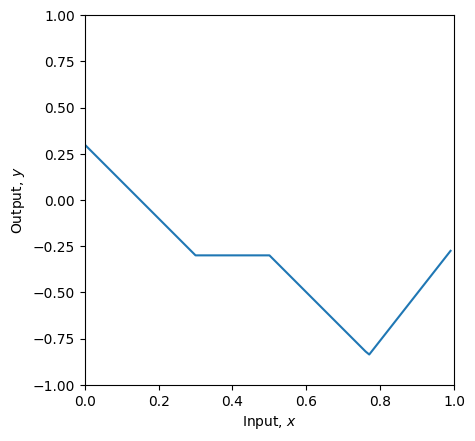

In [20]:
# Now lets define some parameters and run the neural network
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

# Sigmoid activation function

The ReLU isn't the only kind of activation function.  For a long time, people used sigmoid functions.  A logistic sigmoid function is defined by the equation

<center>

![picture](https://drive.google.com/uc?export=view&id=10QtZyTwNsUbbIug2BZYlOiH4THbuurxH)

</center>

(Note that the factor of 10 is not standard -- but it allow us to plot on the same axes as the ReLU examples)

In [21]:
# Define the sigmoid function - Points: 10
def sigmoid(preactivation):
  # TODO write code to implement the sigmoid function and compute the activation at the
  # hidden unit from the preactivation.  Use the np.exp() function.
  return 1/(1+np.exp(-10*preactivation))

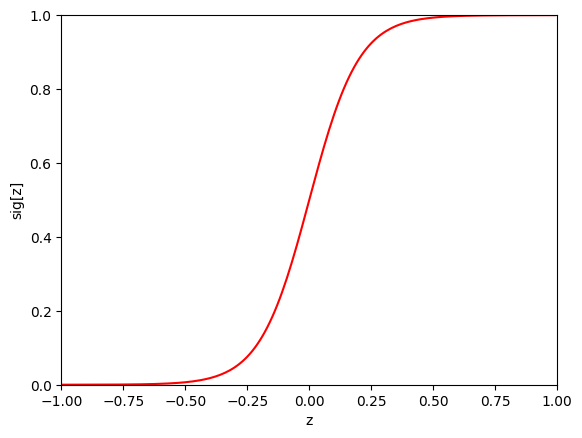

In [22]:
# Make an array of inputs
z = np.arange(-1,1,0.01)
sig_z = sigmoid(z)

# Plot the sigmoid function
fig, ax = plt.subplots()
ax.plot(z,sig_z,'r-')
ax.set_xlim([-1,1]);ax.set_ylim([0,1])
ax.set_xlabel('z'); ax.set_ylabel('sig[z]')
plt.show()

Let's see what happens when we use this activation function in a neural network

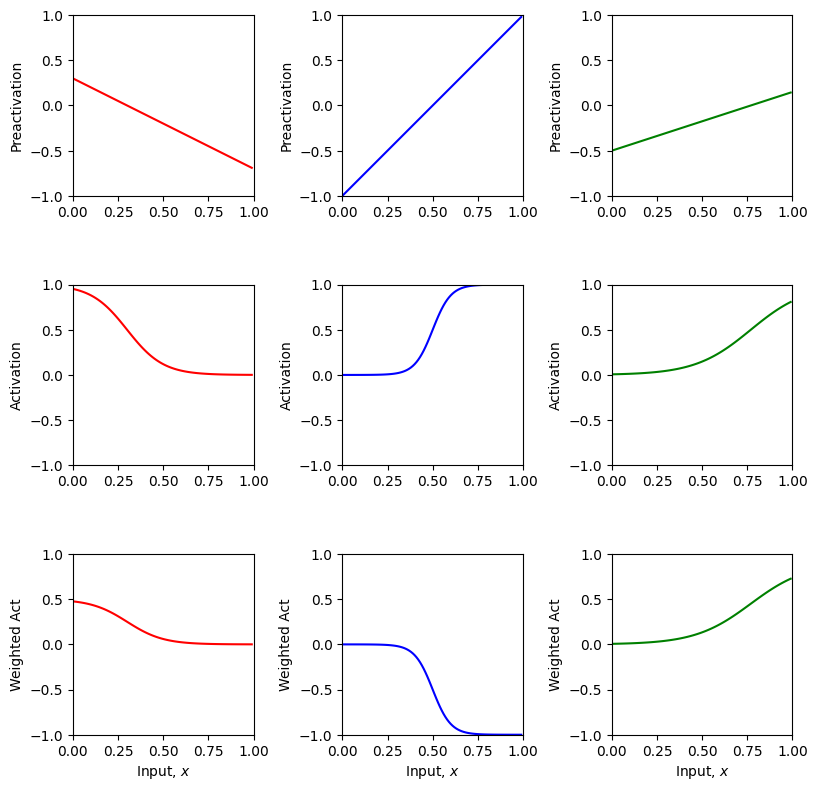

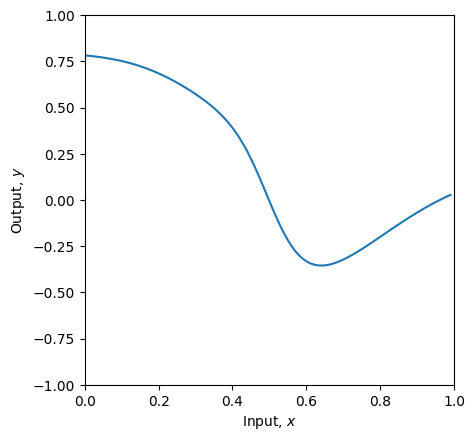

In [23]:
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = 0.3; phi_1 = 0.5; phi_2 = -1.0; phi_3 = 0.9

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, sigmoid, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

You probably notice that this gives nice smooth curves.  So why don't we use this?  Aha... it's not obvious right now, but we will get to it when we learn to fit models.

# Heaviside activation function

The Heaviside function is defined as:

<center>

![picture](https://drive.google.com/uc?export=view&id=1St3i7Zn7ruuHYDQ-WvCkI3Wqs8vZRTN7)

</center>

In [24]:
# Define the heaviside function - Points: 10
def heaviside(preactivation):
  # TODO write code to implement the heaviside function and compute the activation at the
  # hidden unit from the preactivation.
  return np.clip(preactivation, 0, None).astype(bool)

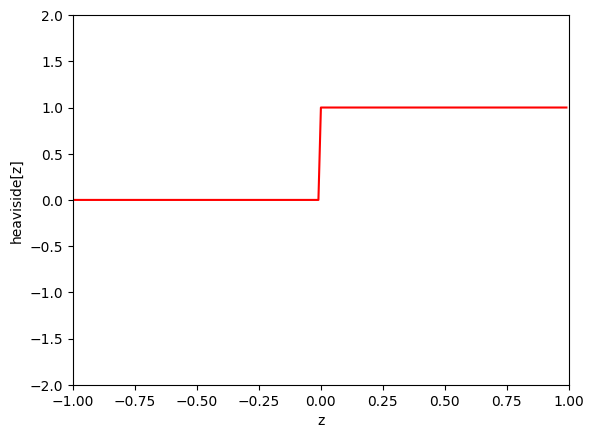

In [25]:
# Make an array of inputs
z = np.arange(-1,1,0.01)
heav_z = heaviside(z)

# Plot the heaviside function
fig, ax = plt.subplots()
ax.plot(z,heav_z,'r-')
ax.set_xlim([-1,1]);ax.set_ylim([-2,2])
ax.set_xlabel('z'); ax.set_ylabel('heaviside[z]')
plt.show()

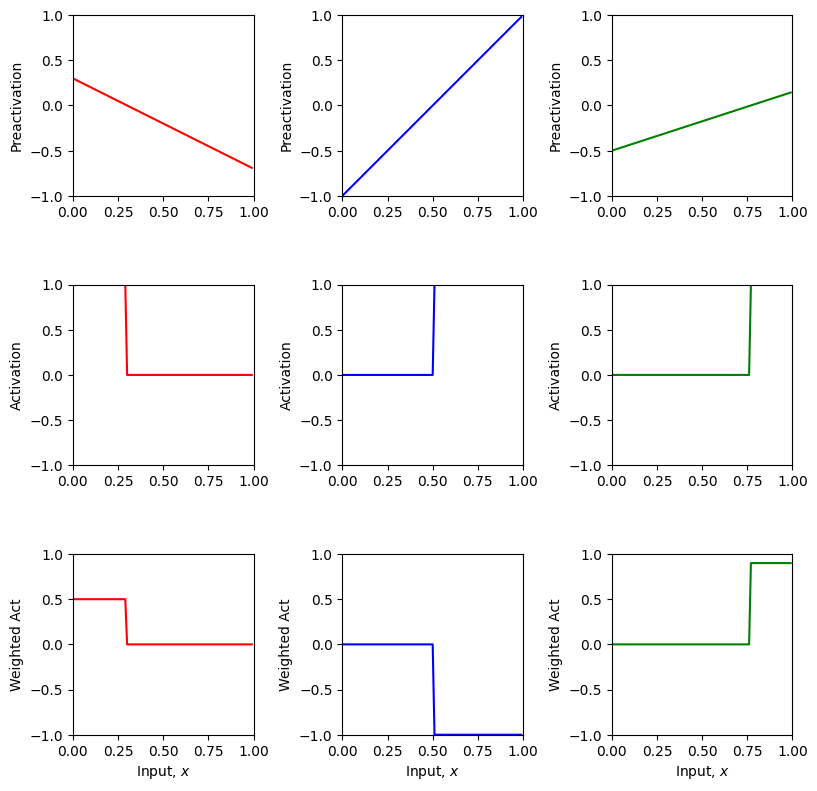

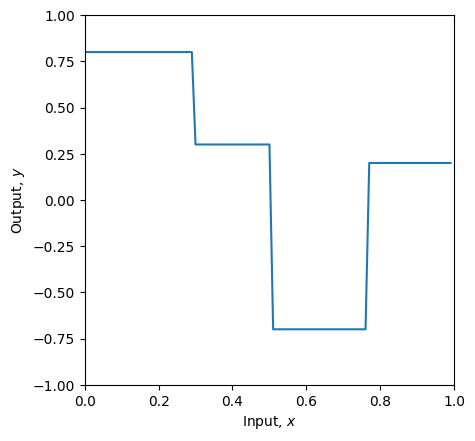

In [26]:
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = 0.3; phi_1 = 0.5; phi_2 = -1.0; phi_3 = 0.9

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, heaviside, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

This can approximate any function, but the output is discontinuous, and there are also reasons not to use it that we will discover when we learn more about model fitting.

# Linear activation functions

Neural networks don't work if the activation function is linear.  For example, consider what would happen if the activation function was:
<center>

![picture](https://drive.google.com/uc?export=view&id=1iVXB1OwpI1Go1K1pFWxmaBIJW-NYALiI)
</center>

In [27]:
# Define the linear activation function
def lin(preactivation):
  a =0
  b =1
  # Compute linear function
  activation = a+b * preactivation
  # Return
  return activation

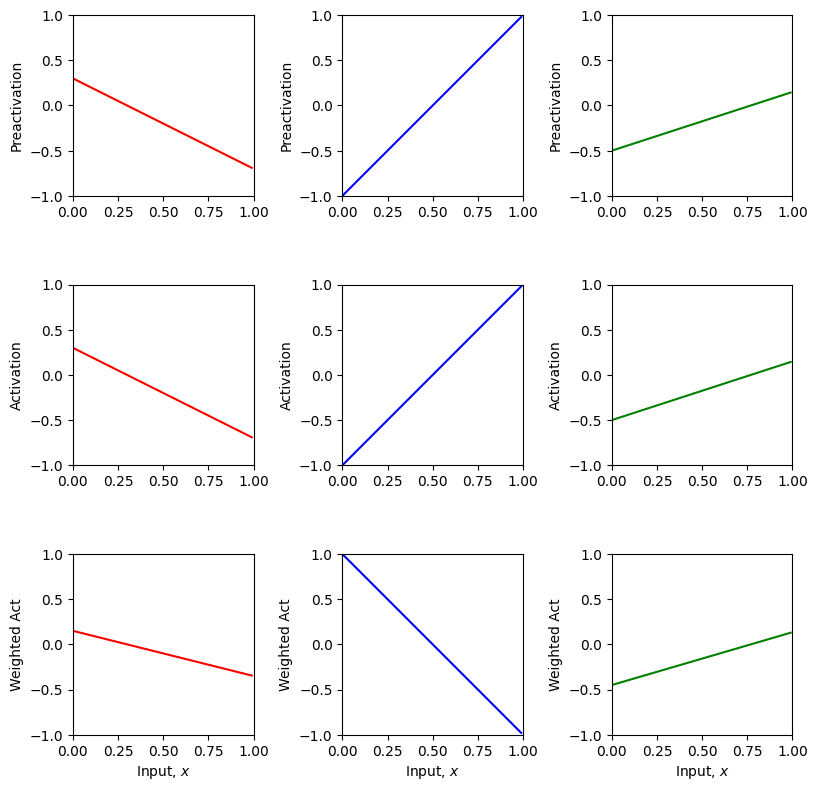

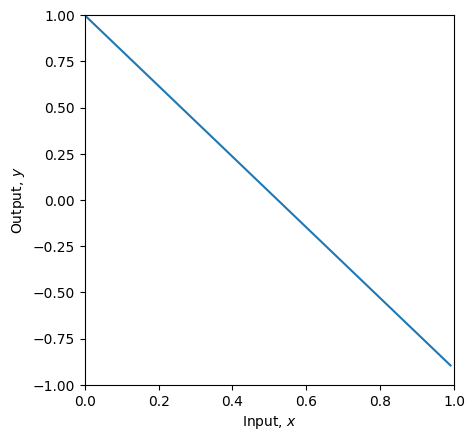

In [28]:
# TODO - Points: 2
# 1. The linear activation function above just returns the input: (0+1*z) = z
# Before running the code Make a prediction about what the ten panels of the drawing will look like
# Now run the code below to see if you were right. What family of functions can this represent?

# 2. What happens if you change the parameters (a,b) to different values?
# Try a=0.5, b=-0.4 Don't forget to run the cell again to update the function

theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = 0.3; phi_1 = 0.5; phi_2 = -1.0; phi_3 = 0.9

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, lin, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

<h3 >This marks the end of the lab. Hope you enjoyed it.</h3>